<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DBSCAN-Lab" data-toc-modified-id="DBSCAN-Lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DBSCAN Lab</a></span><ul class="toc-item"><li><span><a href="#数据集-2" data-toc-modified-id="数据集-2-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>数据集 2</a></span></li><li><span><a href="#实验-DBSCAN-参数的启发法" data-toc-modified-id="实验-DBSCAN-参数的启发法-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>实验 DBSCAN 参数的启发法</a></span><ul class="toc-item"><li><span><a href="#练习" data-toc-modified-id="练习-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>练习</a></span></li></ul></li></ul></li></ul></div>

# DBSCAN Lab
在此 notebook 中，我们将使用 DBSCAN 来聚集几个数据集。我们将研究更改参数（ε 和 min_samples）会如何更改生成的聚类结构。

In [1]:
import pandas as pd
dataset_1 = pd.read_csv('blobs.csv')[:80].values

下面是第一个数据集：

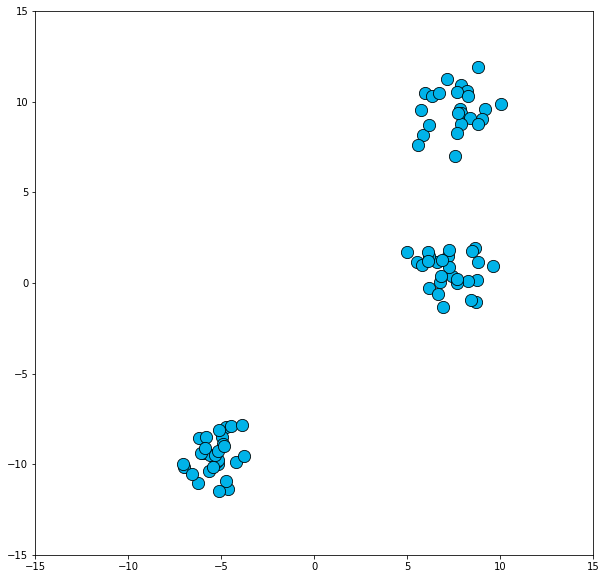

In [2]:
%matplotlib inline

import dbscan_lab_helper as helper
    
helper.plot_dataset(dataset_1)

我们使用 DBSCAN 的默认设置对其进行聚类，看看会发生什么。我们希望它能够将三个“blob”分别分配给各自的聚类。可以通过创新方式完成操作吗？

In [3]:
#TODO: Import sklearn's cluster module
from sklearn import cluster

#TODO: create an instance of DBSCAN
dbscan = cluster.DBSCAN()
#TODO: use DBSCAN's fit_predict to return clustering labels for dataset_1
clustering_labels_1 = dbscan.fit_predict(dataset_1)

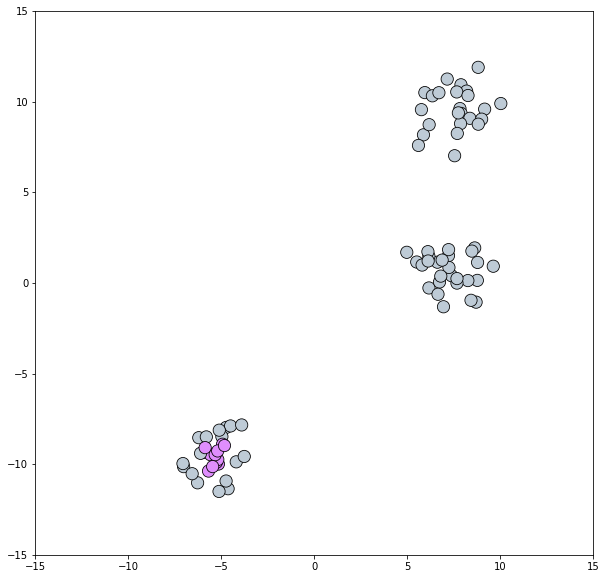

In [4]:
# Plot clustering
helper.plot_clustered_dataset(dataset_1, clustering_labels_1)

看起来合适吗？能够将数据集拆分为我们希望获得的三个聚类吗？

可以看出，我们需要作出一些调整。首先看看 ε，即每个点周围的半径。sklearn 中的默认值为 0.5。

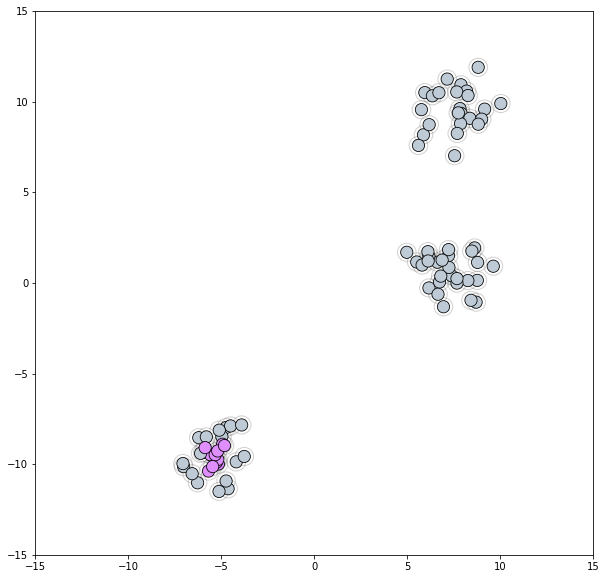

In [5]:
# Plot clustering with neighborhoods
helper.plot_clustered_dataset(dataset_1, clustering_labels_1, neighborhood=True)


从图表中可以看出，对于此数据集来说，ε 为 0.5 太小了。我们需要增大该值，以便 blob 中的点周围不会相互重叠，但是也不会导致一个聚类占据了两个 blob。

**练习**：更改 ε 的值，使每个 blob 都有自己的聚类（没有任何噪点）。图表显示了数据集中的点以及每个点周围的空间：

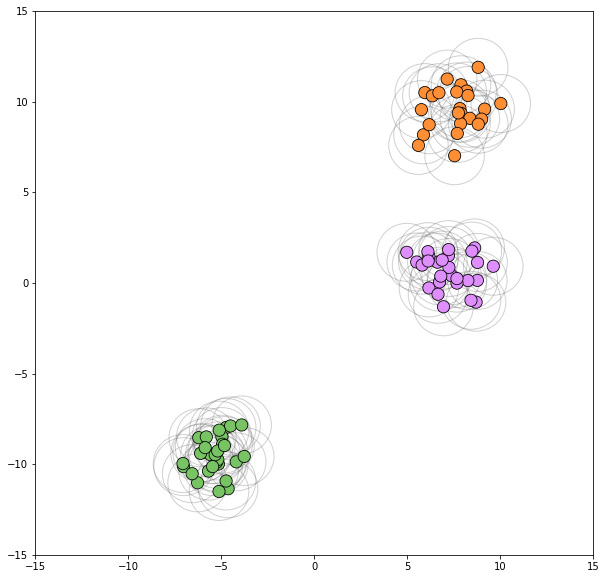

In [6]:
# TODO: increase the value of epsilon to allow DBSCAN to find three clusters in the dataset
epsilon=1.6

# Cluster
dbscan = cluster.DBSCAN(eps=epsilon)
clustering_labels_2 = dbscan.fit_predict(dataset_1)

# Plot
helper.plot_clustered_dataset(dataset_1, clustering_labels_2, neighborhood=True, epsilon=epsilon)

能够这么操作吗？当你更改值时，可以看到点聚合成了更大的聚类，噪点数量不断减少。当 ε 的值超过 1.6 时，获得了我们想要的聚类。但是一旦超过 5，可以看到两个  blob 形成了一个聚类。因此在此情形下，合适的 ε 应该是在这两个值的范围之内。

## 数据集 2

现在看一个有点复杂的数据集

In [7]:
dataset_2 = pd.read_csv('varied.csv')[:300].values

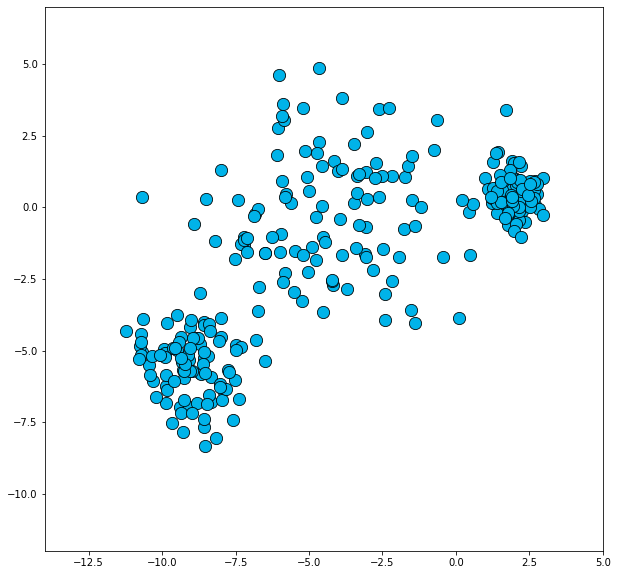

In [8]:
# Plot
helper.plot_dataset(dataset_2, xlim=(-14, 5), ylim=(-12, 7))

如果我们运行 DBSCAN 并传入默认参数值，会发生什么？

In [9]:
# Cluster with DBSCAN
# TODO: Create a new isntance of DBSCAN
dbscan = cluster.DBSCAN()
# TODO: use DBSCAN's fit_predict to return clustering labels for dataset_2
clustering_labels_3 = dbscan.fit_predict(dataset_2)

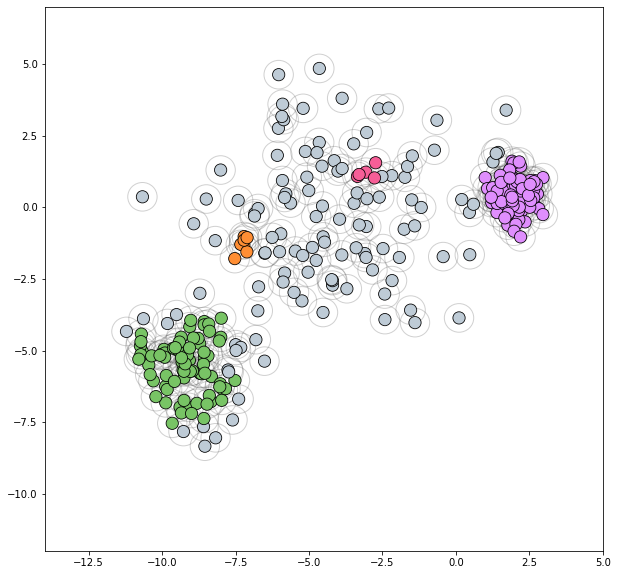

In [10]:
# Plot
helper.plot_clustered_dataset(dataset_2, 
                              clustering_labels_3, 
                              xlim=(-14, 5), 
                              ylim=(-12, 7), 
                              neighborhood=True, 
                              epsilon=0.5)

在某些情形下，这种聚类比较合理，但是似乎很随意。查看数据集后，可以想象出至少有两种想要的操作情形：
 * **情境 1**：将数据集拆分为三个聚类：左边一个 blob、右边一个 blob，中间一个 blob（虽然比两侧的密度要低）。
 * **情境 2**： 将数据集拆分为两个聚类：左边一个 blob，右边一个 blob。将中心的所有点标记为噪点。

什么样的 DBSCAN 参数值可以满足上述每种情形？尝试几种参数，看看能否找到更合适的聚类。

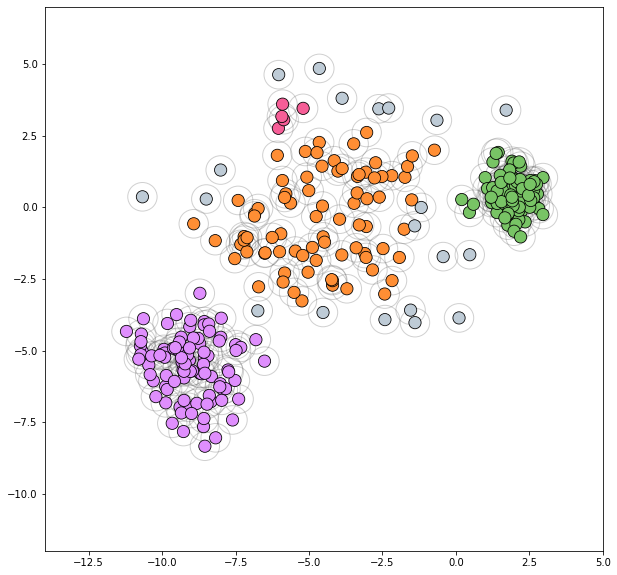

In [11]:
# TODO: Experiment with different values for eps and min_samples to find a suitable clustering for the dataset
eps=1
min_samples=5

# Cluster with DBSCAN
dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
clustering_labels_4 = dbscan.fit_predict(dataset_2)

# Plot
helper.plot_clustered_dataset(dataset_2, 
                              clustering_labels_4, 
                              xlim=(-14, 5), 
                              ylim=(-12, 7), 
                              neighborhood=True, 
                              epsilon=0.5)

以下网格绘制了各种参数值的 DBSCAN 聚类结果。ε 在水平方向变化，在垂直方向，每行表示不同的 min_samples 值。

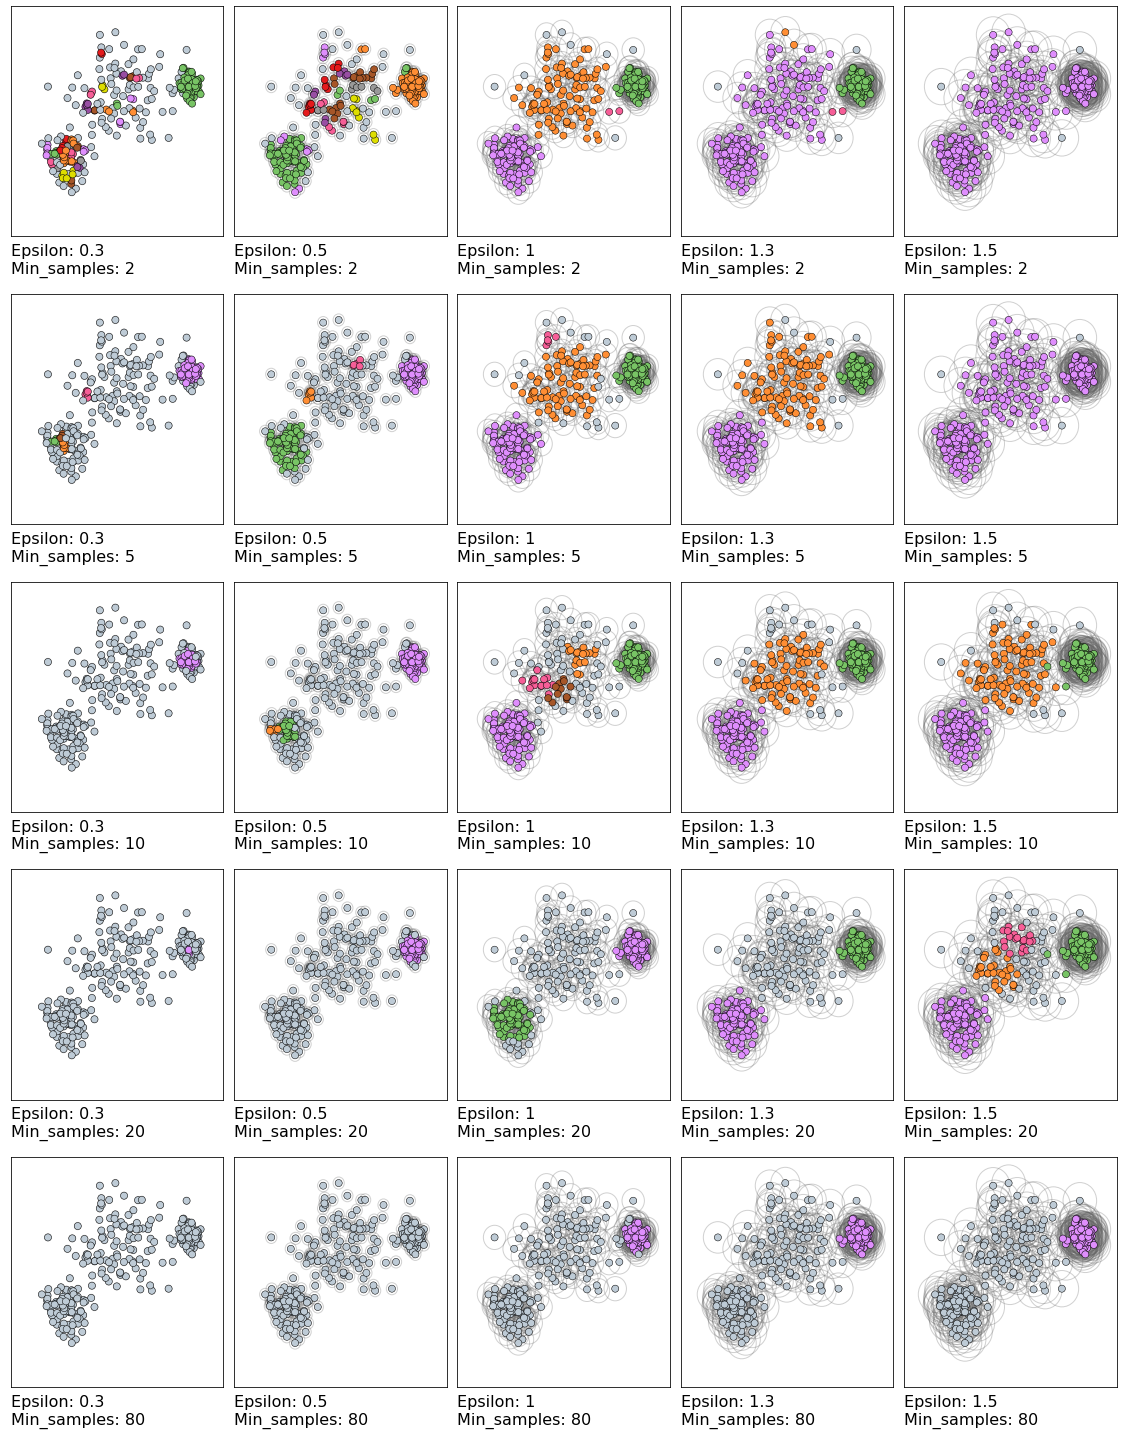

In [12]:
eps_values = [0.3, 0.5, 1, 1.3, 1.5]
min_samples_values = [2, 5, 10, 20, 80]

helper.plot_dbscan_grid(dataset_2, eps_values, min_samples_values)


## 实验 DBSCAN 参数的启发法
查看以下网格，可以猜测出调整 DBSCAN 参数的一般启发法：

|min_samples\epsilon|ε 太低|ε 太高|
| ------ | ------ | ------ |
|**min_samples 太低** |<img src='images/low_epsilon_and_low_min_sample.png'><br>很多小的聚类。超出了数据集的预期数量。<br>**措施**：增大 min_samples 和 ε| <img src='images/high_epsilon_and_low_min_sample.png'><br>很多点都属于一个聚类<br>**措施**：降低 ε 并增大 min_samples |
|**min_samples 太高**|<img src='images/low_epsilon_and_high_min_sample.png'><br>大部分/所有数据点都标记为噪点<br>**措施**：增大 ε 并降低 min_sample| <img src='images/high_epsilon_and_high_min_sample.png'><br>除了非常密集的区域之外，大部分/所有数据点都标记为噪点（或者所有点都标记为噪点）。<br>**措施**：降低 min_samples 和 ε。 |

### 练习
* 你认为哪些值最适合情形 1？
* 你认为哪些值最适合情形 2？